In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import importlib
from os.path import expanduser, join, basename
from os import walk

import task
importlib.reload(task)
from task import generate_trials

import train
importlib.reload(train)
from train import get_default_hp

from network import Model

import my_rnn_functions as mrnn
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

In [23]:
home = expanduser('~')
saving_path = join(home,'My_scripts_Local/Models_Local/ThalRNN/saved_models/')
model_name = 'test0'
#model_name = 'single_module_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_0'
#model_name = 'naive_single_module_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0'
model_dir=join(saving_path,model_name)


In [ ]:
importlib.reload(mrnn)
model_data = mrnn.get_model_data(model_dir)


 n_cortical_units: 80, n_ctx_module_units: 20, n_ctx_module_exc_units: 16, n_ctx_module_inh_units: 4, 
 n_thalamic_units: 40, n_TRN_units: 16, n_exc_thal_units: 24, n_FO_thal_units: 4 
 

Network based on full_EI_CC_TC_with_TRN_v3 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(127, 120) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(120,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(120, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:527: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/test0/model.ckpt
Model hp restored.

 n_cortical_units: 80, n_ctx_module_units: 20, n_ctx_module_exc_units: 16, n_ctx_module_inh_units: 4, 
 n_thalamic_units: 40, n_TRN_units: 16, n_exc_thal_units: 24, n_FO_thal_units: 4 
 

Network based on full_EI_CC_TC_with_TRN_v3 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(127, 120) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(120,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(120, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:527: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


In [21]:
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

8.0% of weights trained.


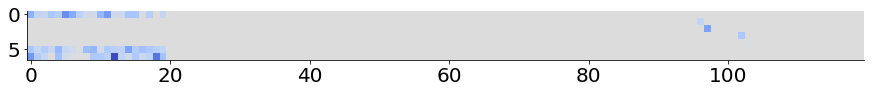

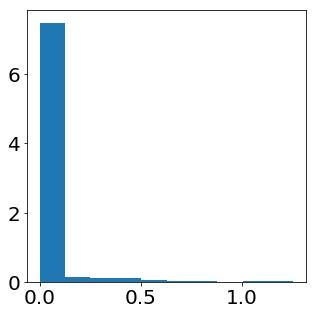

In [22]:
w_type = 'input'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


25.0% of weights trained.


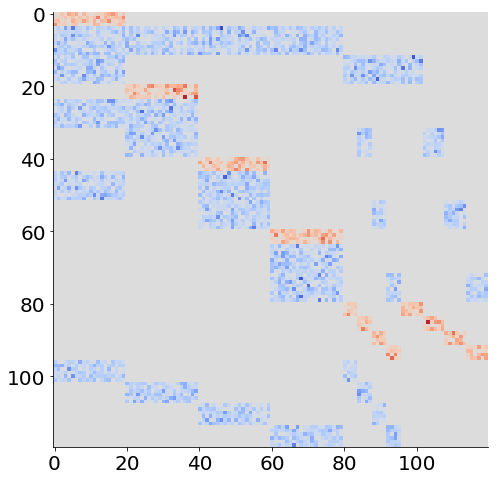

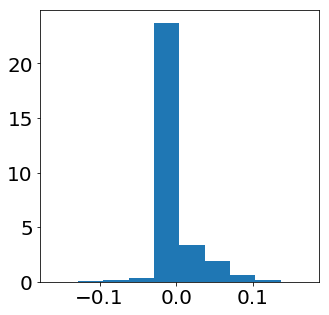

In [6]:
w_type = 'hidden'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


7.000000000000001% of weights trained.


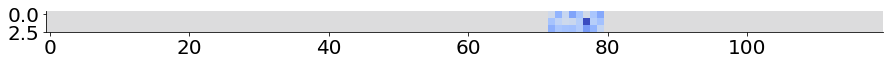

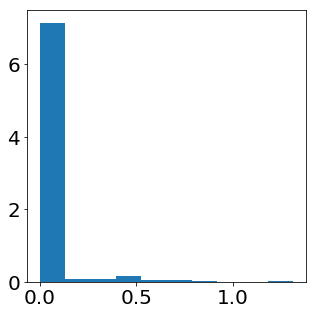

In [7]:
w_type = 'output'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5


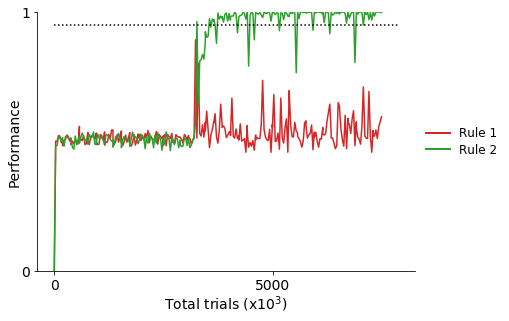

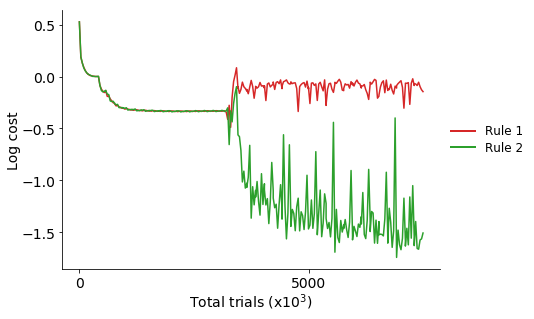

In [93]:
importlib.reload(mrnn)

#trained_models = [basename(x[0]) for x in walk(saving_path) if '_seed_' in x[0]]
#trained_models = ['full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_' + str(i) for i in range(3,4)] # if i != 3 and i != 5]
trained_models = ['smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5']
                  #'smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1']

rules = ['contextdelaydm_MD_task_mod1', 'contextdelaydm_MD_task_mod2'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

colors_to_use = {'contextdelaydm_MD_task_mod1': 'tab:red', 'contextdelaydm_MD_task_mod2': 'tab:green'}
mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=['Rule 1', 'Rule 2'],
                             average_rules=False, colors_to_use=colors_to_use)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0
{'rule_average': 'tab:red'}
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/single_module_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0
{'rule_average': 'tab:pink'}
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/vanilla_RNN_shared_h_contextdelaydm_MD_task_retanh_seed_0
{'rule_average': 'tab:purple'}


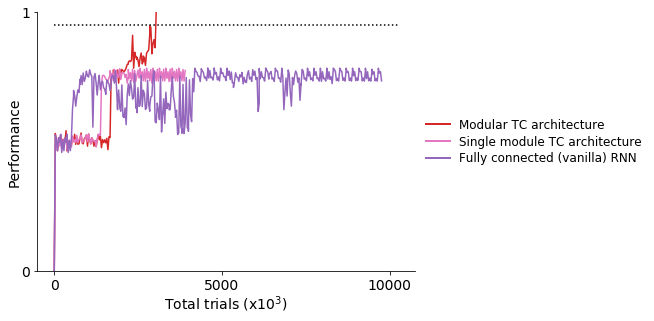

<Figure size 1080x432 with 0 Axes>

In [120]:
importlib.reload(mrnn)

trained_models = ['TC_EI_net_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'sparse_control_EI_TC_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'fully_connected_EI_RNN_contextdelaydm_MD_task_relu_seed_1'
                 ]

trained_models = ['smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0',
                  'single_module_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0',
                  'vanilla_RNN_shared_h_contextdelaydm_MD_task_retanh_seed_0'
                 ]

rules = ['contextdelaydm_MD_task_mod1', 'contextdelaydm_MD_task_mod2'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

labels = ['Modular TC architecture',
          'Single module TC architecture',
          'Fully connected (vanilla) RNN'
         ]

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=labels)


In [121]:
importlib.reload(mrnn)

n_rnn = 100
n_modules = 5
prop_inh = 0.2
prop_TRN = 0.4
plot_2d_3d='3d'
subnetworks_to_plot = 'all'

print(model_name)
subnetworks = mrnn.get_subnetwork_dict(n_rnn, n_modules, prop_inh, prop_TRN, subnetworks_to_plot=subnetworks_to_plot)


smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6


In [268]:
importlib.reload(mrnn)
rule = 'contextdelaydm_MD_task_mod1'
stim1_mod1 = np.array([0])
stim1_mod2 = np.array([1])
single_rule_single_mod_all_sides_subnetworks = mrnn.PCAs_single_rule_single_mod_all_sides(model_dir, rule, subnetworks, 
                                                                                          stim1_mod1=stim1_mod1, stim1_mod2=stim1_mod2,
                                                                                          n_directions=2, 
                                                                                          pre_trial_rule='same_rule_same_mod')


{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 2, 100)
(20, 240)
(240,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 2, 100)
(12, 240)
(240,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 2, 100)
(8, 240)
(240,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 2, 100)
(20, 240)
(240,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 2, 100)
(20, 240)
(240,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 2, 100)
(20, 240)
(240,)


In [71]:
mrnn.plot_subnetwork_PC_projections(single_rule_single_mod_all_sides_subnetworks, plot_2d_3d='3d', colors=['r','g'])

NameError: name 'single_rule_single_mod_all_sides_subnetworks' is not defined

In [110]:
importlib.reload(mrnn)
subnetworks = [sn for sn in subnetworks if sn['name']=='Motor']
rules = ['contextdelaydm_MD_task_mod1', 'contextdelaydm_MD_task_mod2']
lesion_dict = {'lesion_type': 'weights', 
               'pre_units': mrnn.subnetwork_indx('Thal_Mot'),
               'post_units': mrnn.subnetwork_indx('Mot'),
              }
lesion_dict = None
all_rules_single_mods_single_side_subnetworks = mrnn.PCAs_all_rules_single_mods_single_side(model_dir, rules, subnetworks,
                                                                                            direction=0, mod=0,
                                                                                            pre_trial_rule='same_rule_same_mod',
                                                                                            lesion_dict=lesion_dict)


{'stim1_locs': array([0.]), 'stim2_locs': array([3.14159265]), 'stim1_mod1_strengths': array([1]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([0]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/naive_smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0/model.ckpt
(120, 1, 100)
{'stim1_locs': array([0.]), 'stim2_locs': array([3.14159265]), 'stim1_mod1_strengths': array([0]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([1]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=f

/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/naive_smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0/model.ckpt
(120, 1, 100)
(20, 240)
(240,)


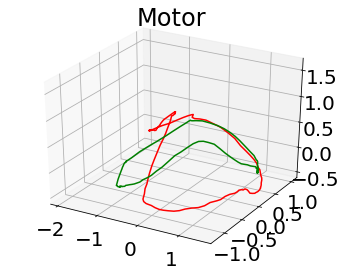

In [89]:
importlib.reload(mrnn)
mrnn.plot_subnetwork_PC_projections(all_rules_single_mods_single_side_subnetworks, plot_single_pc=False, plot_2d_3d='3d', 
                                    colors=['r','g'])

In [266]:
importlib.reload(mrnn)
rule = 'contextdelaydm_MD_task_mod2'
single_rule_all_mods_single_side_subnetworks = mrnn.PCAs_single_rule_all_mods_single_side(model_dir, rule, subnetworks, 
                                                                                          direction=1, 
                                                                                          pre_trial_rule='same_rule_same_mod')


{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([1]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([0]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([0]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([1]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
(20, 240)
(240,)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([1]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([0]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([0]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([1]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
(12, 240)
(240,)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([1]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([0]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' sh

/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([0]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([1]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
(8, 240)
(240,)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([1]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([0]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' sha

/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([0]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([1]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
(20, 240)
(240,)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([1]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([0]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' sh

/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([0]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([1]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
(20, 240)
(240,)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([1]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([0]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
{'stim1_locs': array([3.14159265]), 'stim2_locs': array([0.]), 'stim1_mod1_strengths': array([0]), 'stim2_mod1_strengths': array([0]), 'stim1_mod2_strengths': array([1]), 'stim2_mod2_strengths': array([0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
(120, 1, 100)
(20, 240)
(240,)


/Users/svasquez91/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


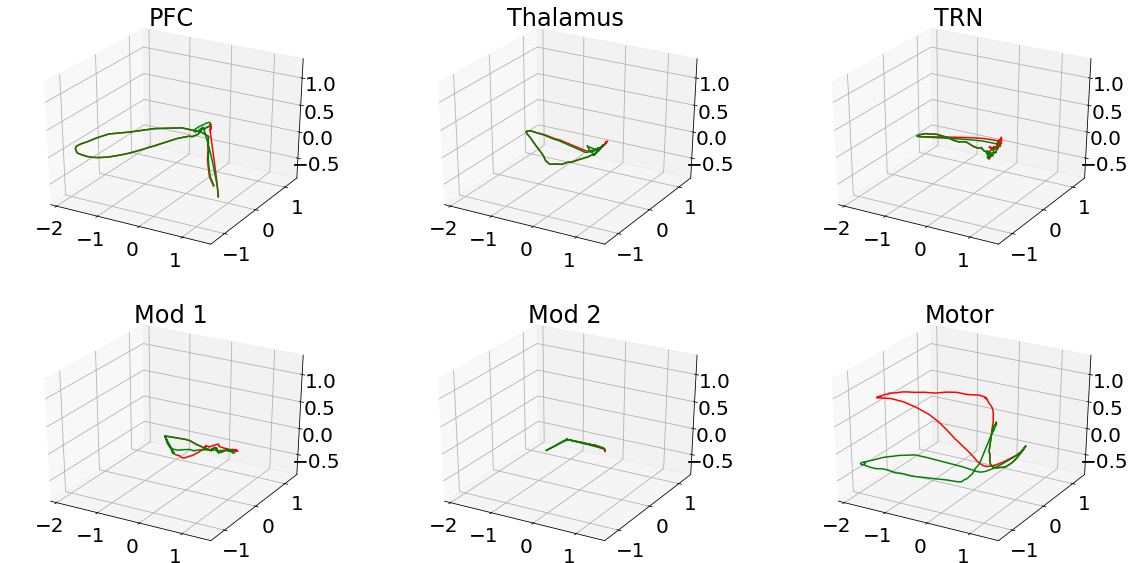

In [267]:
importlib.reload(mrnn)
mrnn.plot_subnetwork_PC_projections(single_rule_all_mods_single_side_subnetworks, plot_single_pc=False, plot_2d_3d='3d', 
                                    colors=['r','g'])


In [118]:
importlib.reload(mrnn)
rules = ['contextdelaydm_MD_task_mod1', 'contextdelaydm_MD_task_mod2']
subnetworks = mrnn.PCAs_all_rules_all_mods_all_sides(model_dir, rules, subnetworks, n_directions=2, 
                                           pre_trial_rule='same_rule_same_mod')

{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
(20, 960)
(960,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
(12, 960)
(960,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
(8, 960)
(960,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
(20, 960)
(960,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
(20, 960)
(960,)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([1, 1]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([0, 0]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
{'stim1_locs': array([0.        , 3.14159265]), 'stim2_locs': array([3.14159265, 0.        ]), 'stim1_mod1_strengths': array([0, 0]), 'stim2_mod1_strengths': array([0, 0]), 'stim1_mod2_strengths': array([1, 1]), 'stim2_mod2_strengths': array([0, 0]), 'stim_time': 1300}

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 2, 100)
(20, 960)
(960,)


In [119]:
labels = ['Rule1/Mod1/GoRight', 'Rule1/Mod1/GoLeft',
          'Rule1/Mod2/GoRight', 'Rule1/Mod2/GoLeft',
          'Rule2/Mod1/GoRight', 'Rule2/Mod1/GoLeft', 
          'Rule2/Mod2/GoRight', 'Rule2/Mod2/GoLeft']

color_by_rule = ['r','r','r','r','g','g','g','g']
color_by_mod = ['r','r','g','g','r','r','g','g']
color_by_side = ['r','g','r','g','r','g','r','g']

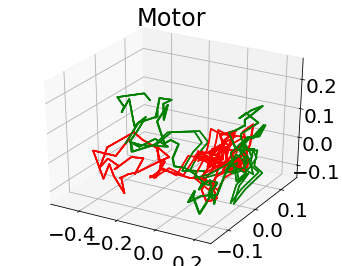

In [113]:
importlib.reload(mrnn)
mrnn.plot_subnetwork_PC_projections(subnetworks, plot_single_pc=False, plot_2d_3d='3d', colors=color_by_side)

In [60]:
importlib.reload(mrnn)
mrnn.subnetwork_indx('Thal_Mod2_FO')

[102, 103]

In [89]:
lesion_dict = {'lesion_type': 'weights', 
               'pre_units': mrnn.subnetwork_indx('PFC'),
               'post_units': mrnn.subnetwork_indx('Mod2'),
              }


In [90]:
importlib.reload(mrnn)

mode = 'both' # detect ignore

if mode == 'both':
    mods = [[1,1], [1,1]]
elif mode == 'detect':
    mods = [[1,0], [0,1]]
elif mode == 'ignore':
    mods = [[0.2,1.0], [1.0,0.2]]
elif mode == 'only_mod1':
    mods = [[1,0], [1,0]]
elif mode == 'only_mod2':
    mods = [[0,1], [0,1]]

mod = mods[0]
rule = 'contextdelaydm_MD_task_mod1'
stim1_mod1 = np.array([mod[0]])
stim1_mod2 = np.array([mod[1]])
pre_trial_rule='same_rule_same_mod' #same_rule_same_mod opp_rule_same_mod
#lesion_dict = None

params1 = mrnn.get_sensory_stim_params(stim1_mod1=stim1_mod1, stim1_mod2=stim1_mod2,
                                      stim2_mod1 = np.array([0]), stim2_mod2 = np.array([0]),
                                      n_repats=10, single_loc=True, stim1_locs_pi = 0)
dict_activations_1 = mrnn.get_all_unit_activations(model_dir, rule, params1, average_activations=False, 
                                                 pre_trial_rule=pre_trial_rule, lesion_dict=lesion_dict)

mod = mods[1]
rule = 'contextdelaydm_MD_task_mod2'
stim1_mod1 = np.array([mod[0]])
stim1_mod2 = np.array([mod[1]])
pre_trial_rule='same_rule_same_mod' #same_rule_same_mod opp_rule_same_mod
#lesion_dict = None

params2 = mrnn.get_sensory_stim_params(stim1_mod1=stim1_mod1, stim1_mod2=stim1_mod2,
                                      stim2_mod1 = np.array([0]), stim2_mod2 = np.array([0]),
                                      n_repats=10, single_loc=True, stim1_locs_pi = 0)
dict_activations_2 = mrnn.get_all_unit_activations(model_dir, rule, params2, average_activations=False, 
                                                 pre_trial_rule=pre_trial_rule, lesion_dict=lesion_dict)



Network based on full_EI_CC_TC_with_TRN_v2 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt

Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt


Thal: range(88, 100)
TRN: range(80, 88)
PFC: range(0, 20)
Mod1: range(20, 40)
Mod2: range(40, 60)
Mot: range(60, 80)


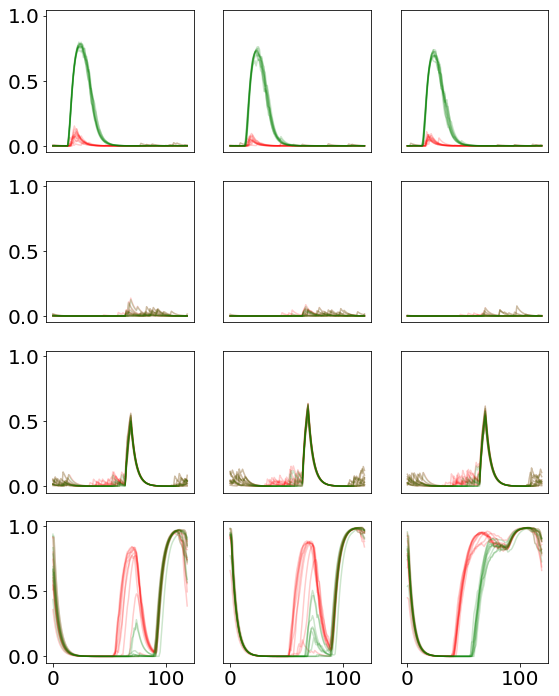

<Figure size 648x864 with 0 Axes>

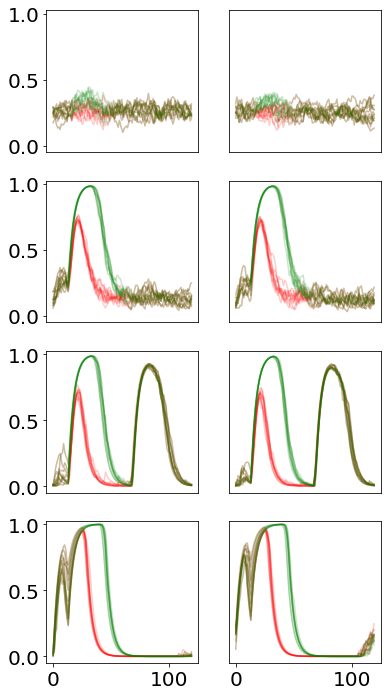

<Figure size 432x864 with 0 Axes>

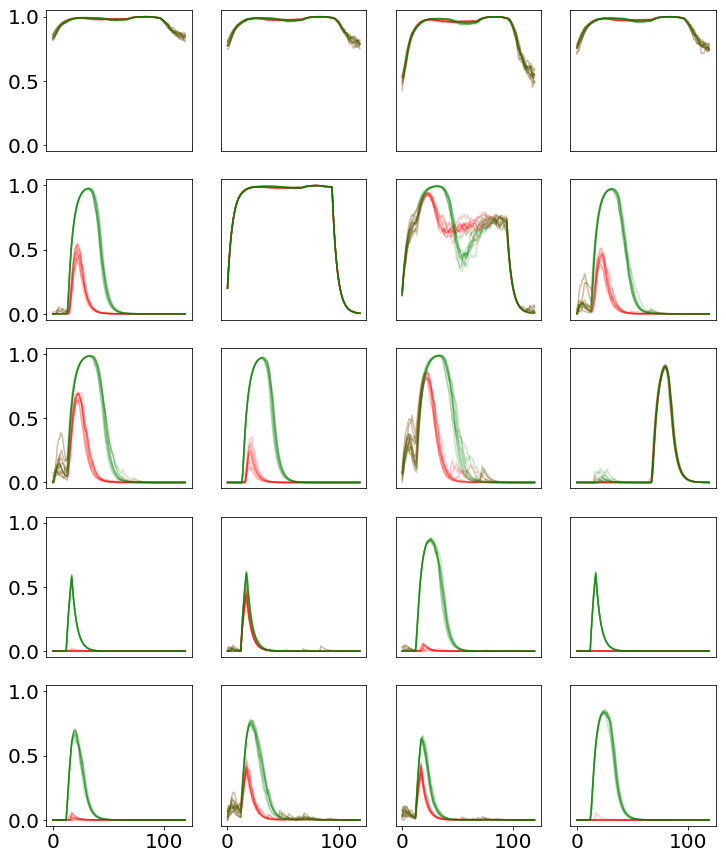

<Figure size 864x1080 with 0 Axes>

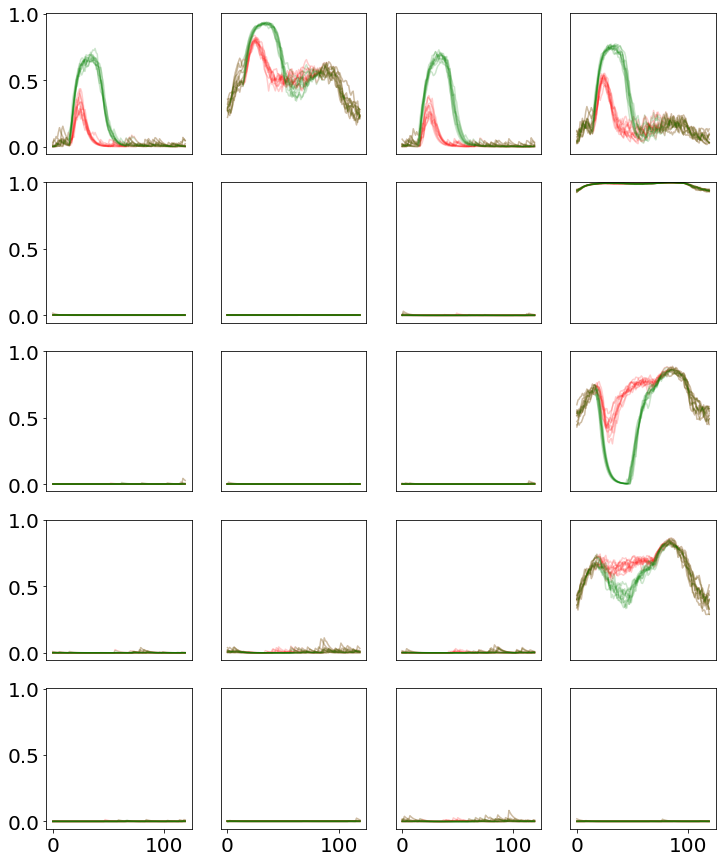

<Figure size 864x1080 with 0 Axes>

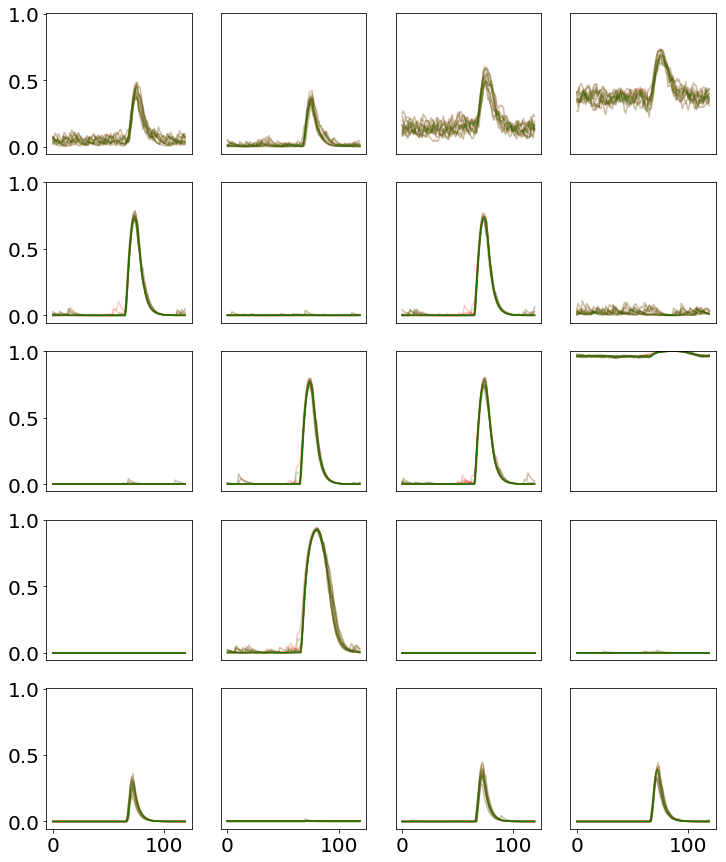

<Figure size 864x1080 with 0 Axes>

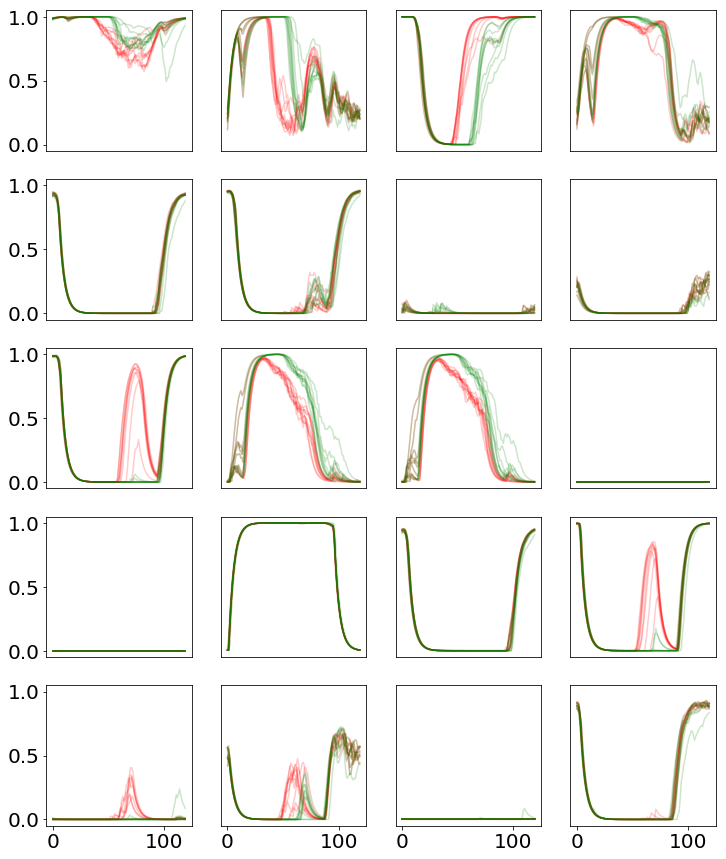

<Figure size 864x1080 with 0 Axes>

In [91]:
importlib.reload(mrnn)
#plot_colors = ['k', 'b']
plot_colors = ['r', 'g']
subsets = ['Thal', 'TRN', 'PFC', 'Mod1', 'Mod2', 'Mot']
subplot_shapes = [[4,3], [4,2], [5,4], [5,4], [5,4], [5,4]] 

for i in range(len(subsets)):
    subset_indexes = mrnn.subnetwork_indx(subsets[i])
    activations_1 = dict_activations_1['hidden'][:, :, subset_indexes]
    activations_2 = dict_activations_2['hidden'][:, :, subset_indexes]

    list_activations = [activations_1, activations_2]
    print(subsets[i] + ': ' + str(subset_indexes))
    mrnn.compare_unit_activations(list_activations, plot_colors, subplot_shapes=subplot_shapes[i])



Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
0.00% performance drop (from 100.00% to 100.00%)


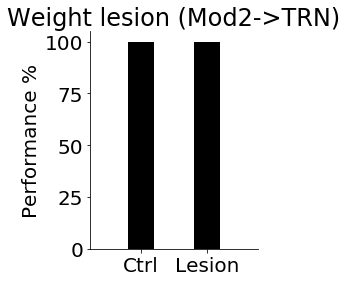

In [162]:
importlib.reload(mrnn)

rule = 'contextdelaydm_MD_task_mod2'
pre_trial_rule='same_rule_same_mod' #same_rule_same_mod # opp_rule_same_mod

pre_units_to_lesion = mrnn.subnetwork_indx('Mod2')
post_units_to_lesion = mrnn.subnetwork_indx('TRN')

perf_pre, perf_post = mrnn.perf_pre_post_lesion(model_dir, rule, pre_units_to_lesion, 
                                                pre_trial_rule=pre_trial_rule, 
                                                lesion_type='weights', post_units=post_units_to_lesion)

print('{:0.2f}% performance drop (from {:0.2f}% to {:0.2f}%)'.format(100*(perf_pre-perf_post), 
                                                                     100*perf_pre, 
                                                                     100*perf_post))

mrnn.bar_plot([perf_pre, perf_post], labels=None, colors=None, 
              title='Weight lesion (Mod2->TRN)') # (Motor->Thal) (Thal->motor)



Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041/model.ckpt
48.50% performance drop (from 100.00% to 51.50%)


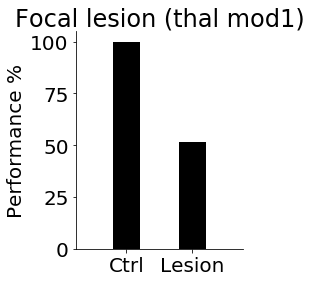

In [30]:
rule = 'contextdelaydm_MD_task_mod2'
pre_trial_rule='same_rule_same_mod' #same_rule_same_mod # opp_rule_same_mod

units_to_lesion = mrnn.subnetwork_indx('Thal_Mot') #[88, 89, 90]

perf_pre, perf_post = mrnn.perf_pre_post_lesion(model_dir, rule, units_to_lesion, 
                                                pre_trial_rule=pre_trial_rule)

print('{:0.2f}% performance drop (from {:0.2f}% to {:0.2f}%)'.format(100*(perf_pre-perf_post), 
                                                                     100*perf_pre, 
                                                                     100*perf_post))

mrnn.bar_plot([perf_pre, perf_post], labels=None, colors=None, title='Focal lesion (thal mod1)')



Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
48.10% performance drop (from 99.90% to 51.80%)


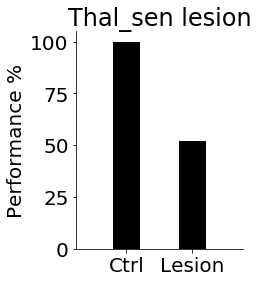


Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
47.10% performance drop (from 99.90% to 52.80%)


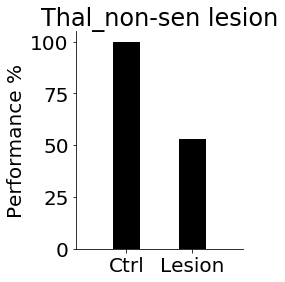


Network based on full_EI_CC_TC_with_TRN_v2 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
52.00% performance drop (from 99.90% to 47.90%)


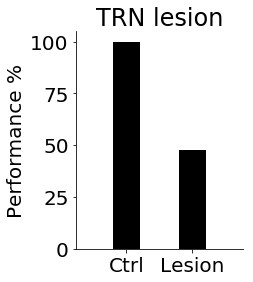


Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
-0.10% performance drop (from 99.90% to 100.00%)


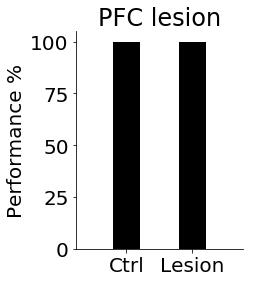


Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
48.10% performance drop (from 99.90% to 51.80%)


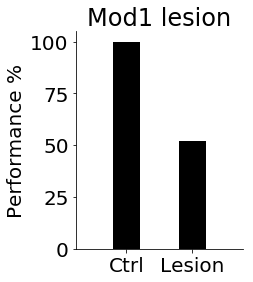


Network based on full_EI_CC_TC_with_TRN_v2 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
71.60% performance drop (from 99.90% to 28.30%)


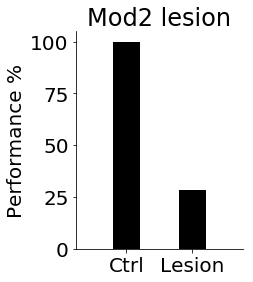


Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
51.70% performance drop (from 99.90% to 48.20%)


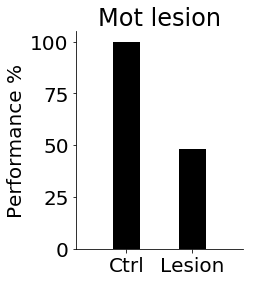

In [68]:
importlib.reload(mrnn)
importlib.reload(mrnn)
subsets = ['Thal_sen', 'Thal_non-sen', 'TRN', 'PFC', 'Mod1', 'Mod2', 'Mot']

rule = 'contextdelaydm_MD_task_mod2'
pre_trial_rule='same_rule_same_mod' #same_rule_same_mod # opp_rule_same_mod

for i in range(len(subsets)):
    
    units_to_lesion = mrnn.subnetwork_indx(subsets[i])

    perf_pre, perf_post = mrnn.perf_pre_post_lesion(model_dir, rule, units_to_lesion, pre_trial_rule=pre_trial_rule)

    print('{:0.2f}% performance drop (from {:0.2f}% to {:0.2f}%)'.format(100*(perf_pre-perf_post), 
                                                                         100*perf_pre, 
                                                                         100*perf_post))

    mrnn.bar_plot([perf_pre, perf_post], labels=None, colors=None, title=subsets[i] + ' lesion')
    

In [69]:
home = expanduser('~')
saving_path = join(home,'My_scripts_Local/Models_Local/ThalRNN/saved_models/')
model_name = 'smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031'
#model_name = 'smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_1_part0041'
model_dir=join(saving_path,model_name)


In [70]:
importlib.reload(mrnn)
model_data = mrnn.get_model_data(model_dir)


Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v2 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:481: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_v2_seed_5_part0031/model.ckpt
